# Kaggle - Shelter Animal Outcomes_6

In [49]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [50]:
train = pd.read_csv("data/train.csv")

print(train.shape)

train.head()

(26729, 10)


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [51]:
test = pd.read_csv("data/test.csv")

print(test.shape)

test.head()

(11456, 8)


,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


## EDA and Visualization

### 1. Dates

In [52]:
train["DateTime"] = pd.to_datetime(train["DateTime"])

train["DateTime-year"] = train["DateTime"].dt.year
train["DateTime-month"] = train["DateTime"].dt.month
train["DateTime-day"] = train["DateTime"].dt.day
train["DateTime-hour"] = train["DateTime"].dt.hour
train["DateTime-minute"] = train["DateTime"].dt.minute
train["DateTime-second"] = train["DateTime"].dt.second
train["DateTime-dayofweek"] = train["DateTime"].dt.dayofweek

print(train.shape)

train[["DateTime", "DateTime-year", "DateTime-month", "DateTime-day", "DateTime-hour", "DateTime-minute", "DateTime-second", "DateTime-dayofweek"]].head()

(26729, 17)


,DateTime,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-minute,DateTime-second,DateTime-dayofweek
0,2014-02-12 18:22:00,2014,2,12,18,22,0,2
1,2013-10-13 12:44:00,2013,10,13,12,44,0,6
2,2015-01-31 12:28:00,2015,1,31,12,28,0,5
3,2014-07-11 19:09:00,2014,7,11,19,9,0,4
4,2013-11-15 12:52:00,2013,11,15,12,52,0,4


### 1-1) 시각화를 하기 전 예상

1. 일단 분(```Dates-minute```), 초(```Dates-second```)는 동물 상태를 판가름하는데 별 영향이 없을 것 같음.
2. 1년에 31일이 있는 달이 절반 정도 밖에 되지 않기 때문에 31일 데이터가 적게 나올것 같음.
3. 반면 시간(```Dates-hour```)은 동물 상태를 판별하는데 큰 영향이 있을 것 같음.

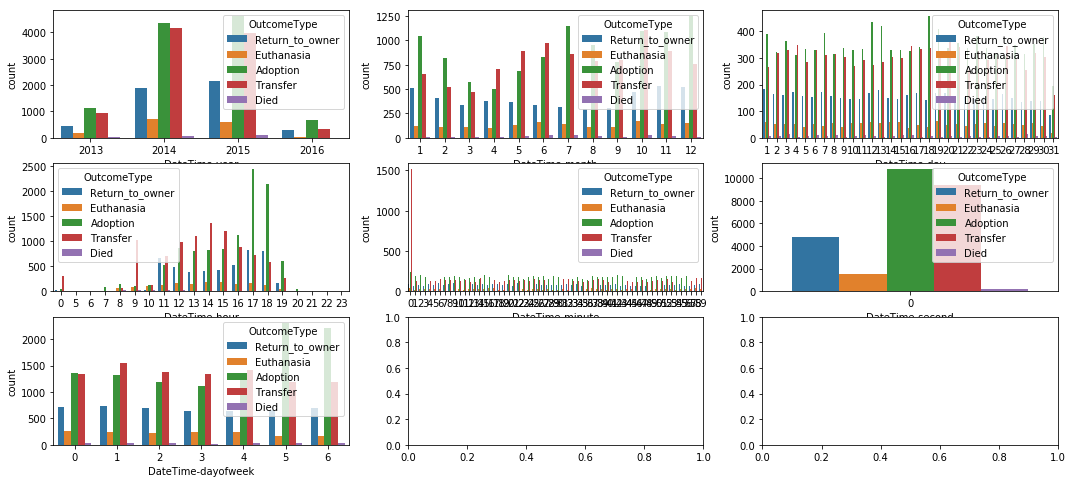

In [53]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

figure.set_size_inches(18, 8)

sns.countplot(data=train, x="DateTime-year", hue="OutcomeType", ax=ax1)
sns.countplot(data=train, x="DateTime-month",hue="OutcomeType",  ax=ax2)
sns.countplot(data=train, x="DateTime-day",hue="OutcomeType",  ax=ax3)
sns.countplot(data=train, x="DateTime-hour",hue="OutcomeType",  ax=ax4)
sns.countplot(data=train, x="DateTime-minute",hue="OutcomeType",  ax=ax5)
sns.countplot(data=train, x="DateTime-second",hue="OutcomeType",  ax=ax6)
sns.countplot(data=train, x="DateTime-dayofweek",hue="OutcomeType",  ax=ax7)

### 1-2) 이 시각화로 발견할 수 있는 사실

1. 초(```Dates-second```)는 전부 0으로 기록되어 있어 의미 있는 데이터가 아님. 분(```Dates-minute```)은 0분이 상당히 높다는 것을 알 수 있음.

2. 일(```Dates-day```) 31일을 제외 하면 크게 특징을 보이는 부분이 없음.

3. 시간(```Dates-hour```)을 확인해 보면 세벽시간과 아침시간에는 거의 없으며, 오후시간 혹은 퇴근 시간이 되면서 늘어남.

### 1-3) 예측 모델 계선 가능성

1. 초(```Dates-second```)는 전부 다 0으로 feature 에 포함 시키지 않아도 될것 같음.
2. 시간(```Dates-hour```) 데이터는 예측하는데 도움이 많이 될것 같음.
3. 31일이 있는 달이 1년의 절반 밖에 되지 않기 때문에 이를 참고 하여 학습을 시켜야 할것 같음.

### 2. Breed

### 2-1) 시각화를 하기 전 예상

1. 품종에 따라 사람들이 선호 하는 종이 있을 것임.
2. 많이 변화가 있는 품종이 있을것이며 거의 없는 품종이 있을 것임.

In [54]:
train["Breed"].value_counts()

Domestic Shorthair Mix                            8810
Pit Bull Mix                                      1906
Chihuahua Shorthair Mix                           1766
Labrador Retriever Mix                            1363
Domestic Medium Hair Mix                           839
German Shepherd Mix                                575
Domestic Longhair Mix                              520
Siamese Mix                                        389
Australian Cattle Dog Mix                          367
Dachshund Mix                                      318
Boxer Mix                                          245
Miniature Poodle Mix                               233
Border Collie Mix                                  229
Australian Shepherd Mix                            163
Catahoula Mix                                      157
Rat Terrier Mix                                    157
Jack Russell Terrier Mix                           146
Yorkshire Terrier Mix                              143
Domestic S

In [55]:
Breed_list = train["Breed"].value_counts().index

Breed_list

Index(['Domestic Shorthair Mix', 'Pit Bull Mix', 'Chihuahua Shorthair Mix',
       'Labrador Retriever Mix', 'Domestic Medium Hair Mix',
       'German Shepherd Mix', 'Domestic Longhair Mix', 'Siamese Mix',
       'Australian Cattle Dog Mix', 'Dachshund Mix',
       ...
       'Chihuahua Shorthair/Finnish Spitz',
       'Miniature Poodle/Australian Cattle Dog', 'Shih Tzu/Norfolk Terrier',
       'Border Terrier/Shih Tzu', 'Collie Rough/Chinese Sharpei',
       'Labrador Retriever/St. Bernard Rough Coat',
       'Collie Rough/German Shepherd', 'Papillon/Border Collie',
       'Silky Terrier/Yorkshire Terrier', 'Greyhound/Labrador Retriever'],
      dtype='object', length=1380)

In [56]:
train["Breed(clean)"] = train["Breed"]


train[["Breed", "Breed(clean)"]].head()

,Breed,Breed(clean)
0,Shetland Sheepdog Mix,Shetland Sheepdog Mix
1,Domestic Shorthair Mix,Domestic Shorthair Mix
2,Pit Bull Mix,Pit Bull Mix
3,Domestic Shorthair Mix,Domestic Shorthair Mix
4,Lhasa Apso/Miniature Poodle,Lhasa Apso/Miniature Poodle


In [57]:
Breed_counts = train["Breed(clean)"].value_counts()

Breed_counts

Domestic Shorthair Mix                            8810
Pit Bull Mix                                      1906
Chihuahua Shorthair Mix                           1766
Labrador Retriever Mix                            1363
Domestic Medium Hair Mix                           839
German Shepherd Mix                                575
Domestic Longhair Mix                              520
Siamese Mix                                        389
Australian Cattle Dog Mix                          367
Dachshund Mix                                      318
Boxer Mix                                          245
Miniature Poodle Mix                               233
Border Collie Mix                                  229
Australian Shepherd Mix                            163
Catahoula Mix                                      157
Rat Terrier Mix                                    157
Jack Russell Terrier Mix                           146
Yorkshire Terrier Mix                              143
Domestic S

In [58]:
top_Breed_counts = Breed_counts[Breed_counts >= 15]
top_Breed_counts = top_Breed_counts.index

print(len(top_Breed_counts.shape))
top_Breed_counts

1


Index(['Domestic Shorthair Mix', 'Pit Bull Mix', 'Chihuahua Shorthair Mix',
       'Labrador Retriever Mix', 'Domestic Medium Hair Mix',
       'German Shepherd Mix', 'Domestic Longhair Mix', 'Siamese Mix',
       'Australian Cattle Dog Mix', 'Dachshund Mix',
       ...
       'Labrador Retriever/Plott Hound', 'Boxer/Labrador Retriever',
       'Belgian Malinois Mix', 'Himalayan Mix', 'Beagle/Chihuahua Shorthair',
       'Miniature Pinscher/Chihuahua Shorthair', 'Harrier Mix', 'Basset Hound',
       'Miniature Pinscher', 'Norwich Terrier Mix'],
      dtype='object', length=140)

In [59]:
train.loc[~train["Breed(clean)"].isin(top_Breed_counts), "Breed(clean)"] = "Others"

print(train.shape)
train[["Breed", "Breed(clean)"]].head()

(26729, 18)


,Breed,Breed(clean)
0,Shetland Sheepdog Mix,Shetland Sheepdog Mix
1,Domestic Shorthair Mix,Domestic Shorthair Mix
2,Pit Bull Mix,Pit Bull Mix
3,Domestic Shorthair Mix,Domestic Shorthair Mix
4,Lhasa Apso/Miniature Poodle,Others


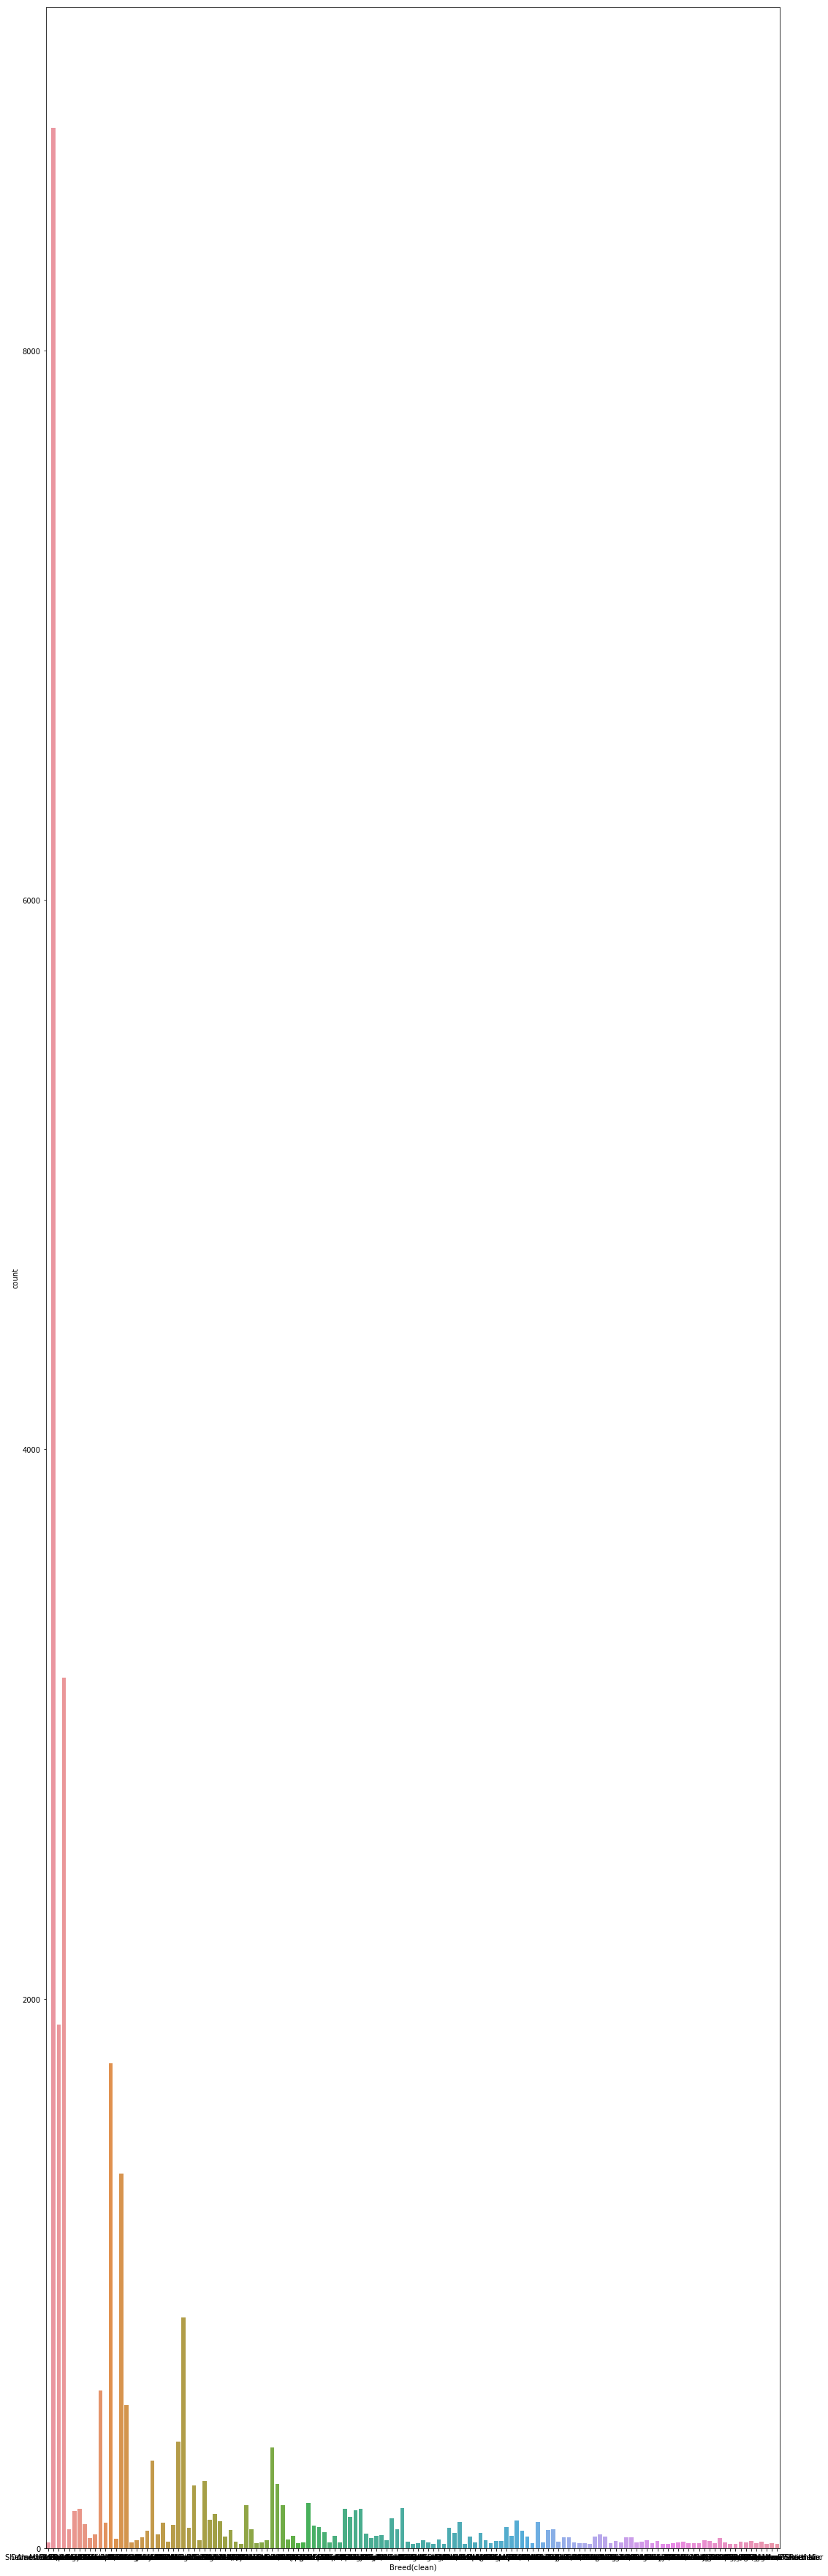

In [60]:
plt.figure(figsize = (18, 64))

sns.countplot(data=train, x="Breed(clean)")

### 2-2) 이 시각화로 발견할 수 있는 사실

1. 품종이 너무나도 다양하며 (1380 종), 1건만 있는 품종도 상당히 많다는 것을 알 수 있음 

2. 1건만 있는 품종을 아웃라이어로 잡고 다시 확인하는 것이 필요함

### 2-3) 예측 모델 계선 가능성

1. 1건만 있는 품종을 처리를 한 이후에 예측을 해야 도움이 될 것 같음.

### 3. Color

### 3-1) 시각화를 하기 전 예상

1. 색에 따라 사람들이 선호 하는 색이 있을 것임.
2. 많이 변화가 있는 색이 있을것이며 거의 없는 색이 있을 것임.

In [61]:
train["Color"].value_counts()

Black/White                    2824
Black                          2292
Brown Tabby                    1635
Brown Tabby/White               940
White                           931
Brown/White                     884
Orange Tabby                    841
Tan/White                       773
Tricolor                        752
Blue/White                      702
Black/Tan                       672
White/Black                     643
Brown                           639
Tan                             628
White/Brown                     569
Tortie                          530
Calico                          517
Orange Tabby/White              455
Brown Brindle/White             450
Blue                            450
Black/Brown                     436
Blue Tabby                      433
White/Tan                       389
Red                             337
Torbie                          335
Brown/Black                     333
Red/White                       331
Blue Tabby/White            

In [62]:
train["Color(clean)"] = train["Color"]


train[["Color", "Color(clean)"]].head()

,Color,Color(clean)
0,Brown/White,Brown/White
1,Cream Tabby,Cream Tabby
2,Blue/White,Blue/White
3,Blue Cream,Blue Cream
4,Tan,Tan


In [63]:
Color_lists = train["Color(clean)"].value_counts()

Color_lists

Black/White                    2824
Black                          2292
Brown Tabby                    1635
Brown Tabby/White               940
White                           931
Brown/White                     884
Orange Tabby                    841
Tan/White                       773
Tricolor                        752
Blue/White                      702
Black/Tan                       672
White/Black                     643
Brown                           639
Tan                             628
White/Brown                     569
Tortie                          530
Calico                          517
Orange Tabby/White              455
Brown Brindle/White             450
Blue                            450
Black/Brown                     436
Blue Tabby                      433
White/Tan                       389
Red                             337
Torbie                          335
Brown/Black                     333
Red/White                       331
Blue Tabby/White            

In [64]:
top_Color_lists = Color_lists[Color_lists >= 15]
top_Color_lists = top_Color_lists.index

print(top_Color_lists.shape)

top_Color_lists

(113,)


Index(['Black/White', 'Black', 'Brown Tabby', 'Brown Tabby/White', 'White',
       'Brown/White', 'Orange Tabby', 'Tan/White', 'Tricolor', 'Blue/White',
       ...
       'Tan/Gray', 'Chocolate Point', 'Cream/Black', 'White/Blue Tabby',
       'Sable/Tan', 'Gray/Black', 'Gray Tabby/White', 'Red Tick/White',
       'Orange', 'Black Smoke/White'],
      dtype='object', length=113)

In [65]:
train.loc[~train["Color(clean)"].isin(top_Color_lists), "Color(clean)"] = "Others"

print(train.shape)
train[["Color", "Color(clean)"]].head()

(26729, 19)


,Color,Color(clean)
0,Brown/White,Brown/White
1,Cream Tabby,Cream Tabby
2,Blue/White,Blue/White
3,Blue Cream,Others
4,Tan,Tan


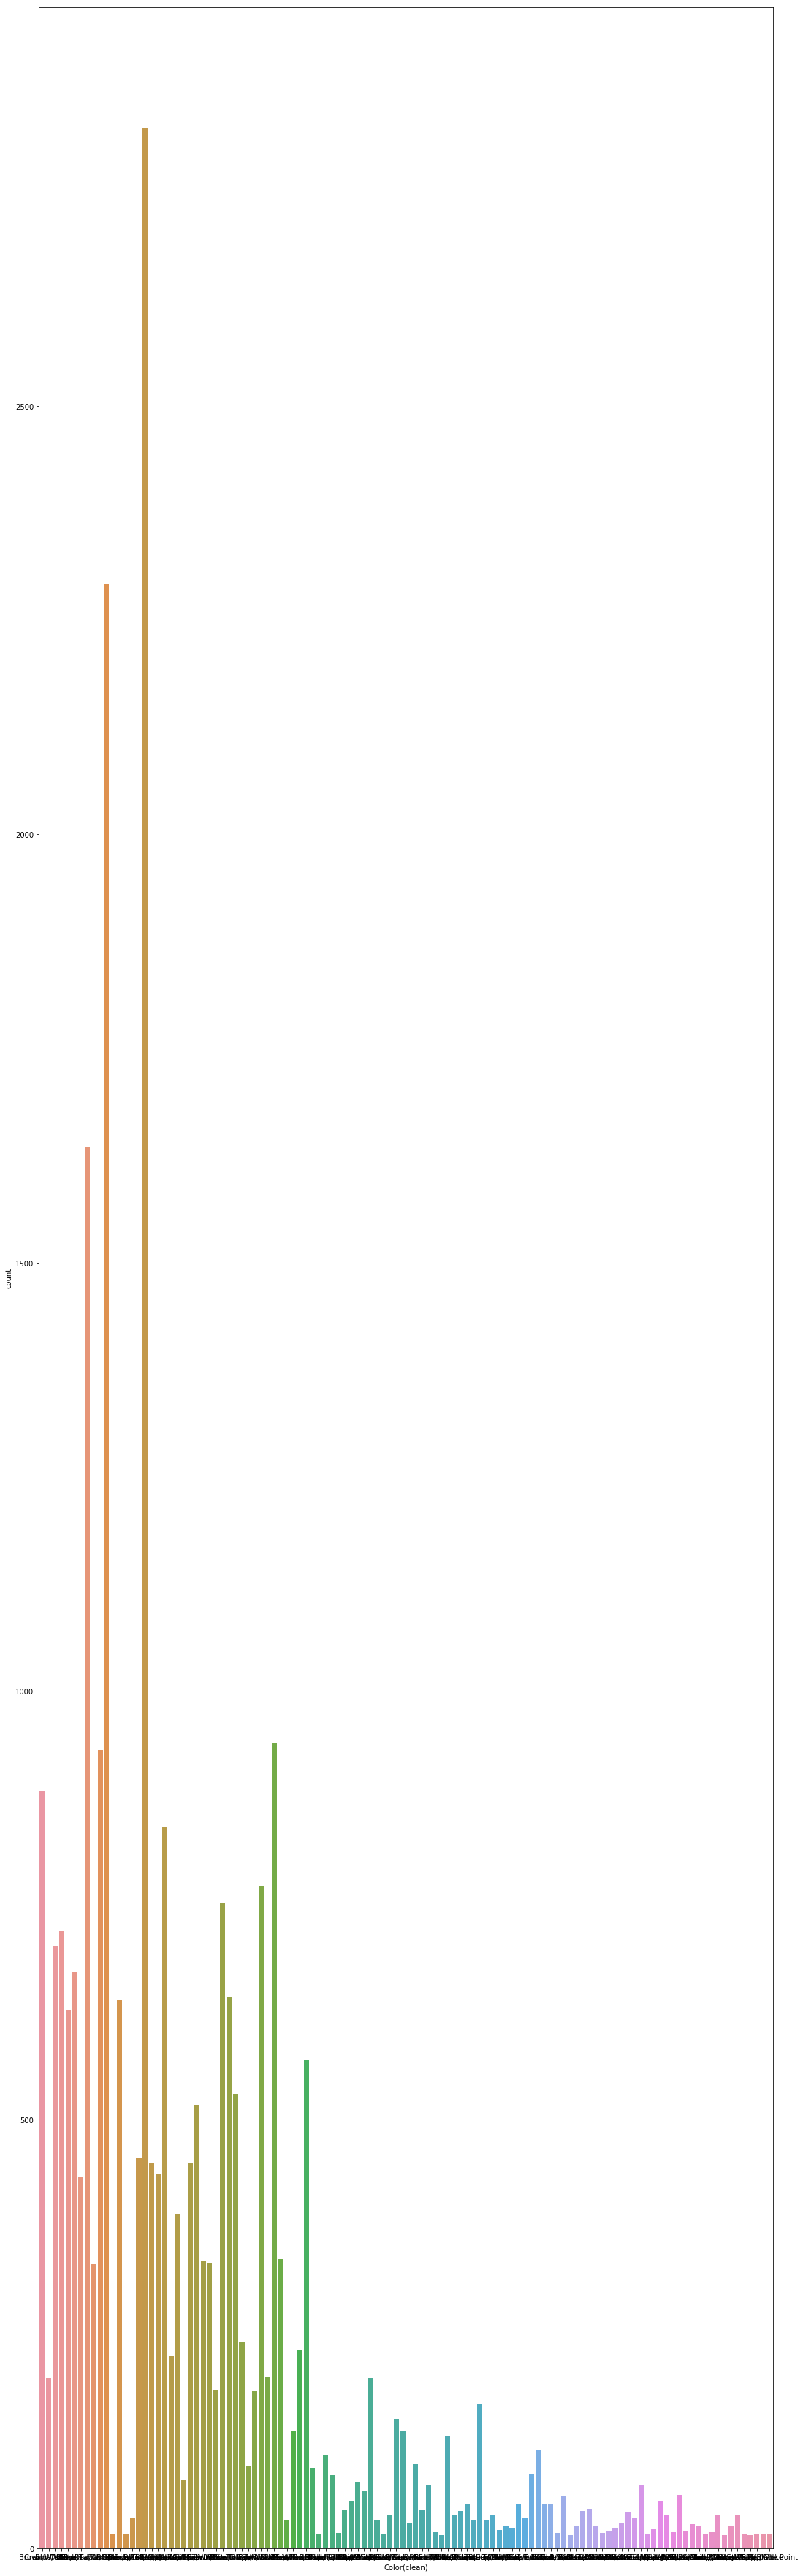

In [66]:
plt.figure(figsize = (18, 64))

sns.countplot(data=train, x="Color(clean)")

### 3-2) 이 시각화로 발견할 수 있는 사실

1. 색이 다양하며 (366 종), 1건만 있는 색상도 상당히 많다는 것을 알 수 있음 

2. 1건만 있는 색상을 아웃라이어로 잡고 다시 확인하는 것이 필요함

### 3-3) 예측 모델 계선 가능성

1. 1건만 있는 색상을 처리를 한 이후에 예측을 해야 도움이 될 것 같음.

### 4. SexuponOutcome

In [67]:
train["SexuponOutcome"].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

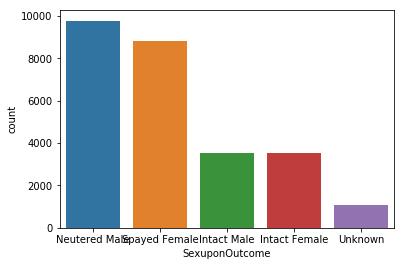

In [68]:
sns.countplot(data=train, x="SexuponOutcome")

### 5. AnimalType

In [69]:
train["AnimalType"].value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

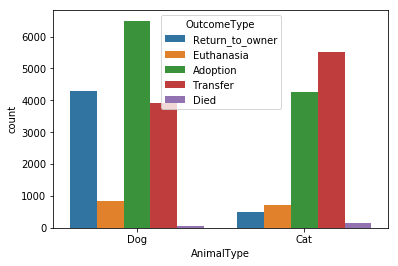

In [70]:
sns.countplot(data=train, x="AnimalType", hue = "OutcomeType")

## Reload Dataset

In [71]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-minute,DateTime-second,DateTime-dayofweek,Breed(clean),Color(clean)
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,2014,2,12,18,22,0,2,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2013,10,13,12,44,0,6,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2015,1,31,12,28,0,5,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,2014,7,11,19,9,0,4,Domestic Shorthair Mix,Others
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2013,11,15,12,52,0,4,Others,Tan


In [72]:
test = pd.read_csv("data/test.csv")

print(test.shape)
test.head()

(11456, 8)


,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [73]:
test["DateTime"] = pd.to_datetime(test["DateTime"])

test["DateTime-year"] = test["DateTime"].dt.year
test["DateTime-month"] = test["DateTime"].dt.month
test["DateTime-day"] = test["DateTime"].dt.day
test["DateTime-hour"] = test["DateTime"].dt.hour
test["DateTime-minute"] = test["DateTime"].dt.minute
test["DateTime-second"] = test["DateTime"].dt.second
test["DateTime-dayofweek"] = test["DateTime"].dt.dayofweek

print(test.shape)

test[["DateTime", "DateTime-year", "DateTime-month", "DateTime-day", "DateTime-hour", "DateTime-minute", "DateTime-second", "DateTime-dayofweek"]].head()

(11456, 15)


,DateTime,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-minute,DateTime-second,DateTime-dayofweek
0,2015-10-12 12:15:00,2015,10,12,12,15,0,0
1,2014-07-26 17:59:00,2014,7,26,17,59,0,5
2,2016-01-13 12:20:00,2016,1,13,12,20,0,2
3,2013-12-28 18:12:00,2013,12,28,18,12,0,5
4,2015-09-24 17:59:00,2015,9,24,17,59,0,3


In [74]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-minute,DateTime-second,DateTime-dayofweek
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White,2015,10,12,12,15,0,0
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan,2014,7,26,17,59,0,5
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby,2016,1,13,12,20,0,2
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor,2013,12,28,18,12,0,5
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White,2015,9,24,17,59,0,3


### 1. Breed

In [75]:
train_Breed = pd.get_dummies(train["Breed(clean)"])

print(train_Breed.shape)
train_Breed.head()

(26729, 141)


,American Bulldog Mix,American Pit Bull Terrier Mix,American Staffordshire Terrier Mix,Anatol Shepherd Mix,Australian Cattle Dog,Australian Cattle Dog Mix,Australian Cattle Dog/Labrador Retriever,Australian Kelpie Mix,Australian Shepherd Mix,Basset Hound,...,Siberian Husky,Siberian Husky Mix,Snowshoe Mix,Soft Coated Wheaten Terrier Mix,Staffordshire Mix,Toy Poodle Mix,Weimaraner Mix,Whippet Mix,Yorkshire Terrier,Yorkshire Terrier Mix
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
from scipy.sparse import csr_matrix

train_Breed = csr_matrix(train_Breed)
train_Breed

<26729x141 sparse matrix of type '<class 'numpy.uint8'>'
	with 26729 stored elements in Compressed Sparse Row format>

In [77]:
test["Breed(clean)"] = test["Breed"]

In [78]:
test.loc[~test["Breed(clean)"].isin(top_Breed_counts), "Breed(clean)"] = "Others"

print(test.shape)
test[["Breed", "Breed(clean)"]].head()

(11456, 16)


,Breed,Breed(clean)
0,Labrador Retriever Mix,Labrador Retriever Mix
1,German Shepherd/Siberian Husky,Others
2,Domestic Shorthair Mix,Domestic Shorthair Mix
3,Collie Smooth Mix,Collie Smooth Mix
4,Miniature Poodle Mix,Miniature Poodle Mix


In [79]:
test_Breed = pd.get_dummies(test["Breed(clean)"])

print(test_Breed.shape)
test_Breed.head()

(11456, 141)


,American Bulldog Mix,American Pit Bull Terrier Mix,American Staffordshire Terrier Mix,Anatol Shepherd Mix,Australian Cattle Dog,Australian Cattle Dog Mix,Australian Cattle Dog/Labrador Retriever,Australian Kelpie Mix,Australian Shepherd Mix,Basset Hound,...,Siberian Husky,Siberian Husky Mix,Snowshoe Mix,Soft Coated Wheaten Terrier Mix,Staffordshire Mix,Toy Poodle Mix,Weimaraner Mix,Whippet Mix,Yorkshire Terrier,Yorkshire Terrier Mix
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
test_Breed = csr_matrix(test_Breed)
test_Breed

<11456x141 sparse matrix of type '<class 'numpy.uint8'>'
	with 11456 stored elements in Compressed Sparse Row format>

### 2. Color

In [81]:
train_Color = pd.get_dummies(train["Color(clean)"])

print(train_Color.shape)
train_Color.head()

(26729, 114)


,Apricot,Black,Black Brindle,Black Brindle/White,Black Smoke,Black Smoke/White,Black Tabby,Black Tabby/White,Black/Brown,Black/Brown Brindle,...,White/Cream,White/Gray,White/Orange,White/Orange Tabby,White/Red,White/Tan,White/Tricolor,Yellow,Yellow Brindle/White,Yellow/White
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
from scipy.sparse import csr_matrix

train_Color = csr_matrix(train_Color)
train_Color

<26729x114 sparse matrix of type '<class 'numpy.uint8'>'
	with 26729 stored elements in Compressed Sparse Row format>

In [83]:
test["Color(clean)"] = test["Color"]

In [84]:
test.loc[~test["Color(clean)"].isin(top_Color_lists), "Color(clean)"] = "Others"

print(test.shape)
test[["Color", "Color(clean)"]].head()

(11456, 17)


,Color,Color(clean)
0,Red/White,Red/White
1,Black/Tan,Black/Tan
2,Brown Tabby,Brown Tabby
3,Tricolor,Tricolor
4,White,White


In [85]:
test_Color = pd.get_dummies(test["Color(clean)"])

print(test_Color.shape)
test_Color.head()

(11456, 114)


,Apricot,Black,Black Brindle,Black Brindle/White,Black Smoke,Black Smoke/White,Black Tabby,Black Tabby/White,Black/Brown,Black/Brown Brindle,...,White/Cream,White/Gray,White/Orange,White/Orange Tabby,White/Red,White/Tan,White/Tricolor,Yellow,Yellow Brindle/White,Yellow/White
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
test_Color = csr_matrix(test_Color)
test_Color

<11456x114 sparse matrix of type '<class 'numpy.uint8'>'
	with 11456 stored elements in Compressed Sparse Row format>

### 3. SexuponOutcome

In [87]:
train_Sexupon = pd.get_dummies(train["SexuponOutcome"])

print(train_Sexupon.shape)
train_Sexupon.head()

(26729, 5)


,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [88]:
train_Sexupon = csr_matrix(train_Sexupon)

train_Sexupon

<26729x5 sparse matrix of type '<class 'numpy.uint8'>'
	with 26728 stored elements in Compressed Sparse Row format>

In [89]:
test_Sexupon = pd.get_dummies(test["SexuponOutcome"])

print(test_Sexupon.shape)
test_Sexupon.head()

(11456, 5)


,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [90]:
test_Sexupon = csr_matrix(test_Sexupon)

test_Sexupon

<11456x5 sparse matrix of type '<class 'numpy.uint8'>'
	with 11456 stored elements in Compressed Sparse Row format>

In [91]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-minute,DateTime-second,DateTime-dayofweek,Breed(clean),Color(clean)
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,2014,2,12,18,22,0,2,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2013,10,13,12,44,0,6,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2015,1,31,12,28,0,5,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,2014,7,11,19,9,0,4,Domestic Shorthair Mix,Others
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2013,11,15,12,52,0,4,Others,Tan


In [92]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-minute,DateTime-second,DateTime-dayofweek,Breed(clean),Color(clean)
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White,2015,10,12,12,15,0,0,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan,2014,7,26,17,59,0,5,Others,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby,2016,1,13,12,20,0,2,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor,2013,12,28,18,12,0,5,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White,2015,9,24,17,59,0,3,Miniature Poodle Mix,White


### 4. AnimalType

In [93]:
train["AnimalType(clear)"] = train["AnimalType"]

train["AnimalType(clear)"].head()

0    Dog
1    Cat
2    Dog
3    Cat
4    Dog
Name: AnimalType(clear), dtype: object

In [94]:
train["AnimalType(clear)"] = train["AnimalType"].replace("Dog", 0).replace("Cat", 1)

train[["AnimalType", "AnimalType(clear)"]].head()

,AnimalType,AnimalType(clear)
0,Dog,0
1,Cat,1
2,Dog,0
3,Cat,1
4,Dog,0


In [95]:
test["AnimalType(clear)"] = test["AnimalType"]

test["AnimalType(clear)"].head()

0    Dog
1    Dog
2    Cat
3    Dog
4    Dog
Name: AnimalType(clear), dtype: object

In [96]:
test["AnimalType(clear)"] = test["AnimalType"].replace("Dog", 0).replace("Cat", 1)

test[["AnimalType", "AnimalType(clear)"]].head()

,AnimalType,AnimalType(clear)
0,Dog,0
1,Dog,0
2,Cat,1
3,Dog,0
4,Dog,0


## Train

In [97]:
feature_name = ["DateTime-year", "DateTime-month", "DateTime-day", "DateTime-hour", "DateTime-dayofweek", "AnimalType(clear)"]

feature_name

['DateTime-year',
 'DateTime-month',
 'DateTime-day',
 'DateTime-hour',
 'DateTime-dayofweek',
 'AnimalType(clear)']

In [98]:
X_train = train[feature_name]

print(X_train.shape)
X_train.head()

(26729, 6)


,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-dayofweek,AnimalType(clear)
0,2014,2,12,18,2,0
1,2013,10,13,12,6,1
2,2015,1,31,12,5,0
3,2014,7,11,19,4,1
4,2013,11,15,12,4,0


In [99]:
X_test = test[feature_name]

print(X_test.shape)
X_test.head()

(11456, 6)


,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-dayofweek,AnimalType(clear)
0,2015,10,12,12,0,0
1,2014,7,26,17,5,0
2,2016,1,13,12,2,1
3,2013,12,28,18,5,0
4,2015,9,24,17,3,0


In [100]:
label_name = "OutcomeType"

y_train = train[label_name]

print(y_train.shape)

y_train.head()

(26729,)


0    Return_to_owner
1         Euthanasia
2           Adoption
3           Transfer
4           Transfer
Name: OutcomeType, dtype: object

In [101]:
from scipy.sparse import hstack

X_train = hstack([X_train.astype('float'), train_Breed])
X_train

<26729x147 sparse matrix of type '<class 'numpy.float64'>'
	with 167434 stored elements in COOrdinate format>

In [121]:
X_test = hstack([X_test.astype('float'), test_Breed])
X_test

<11456x407 sparse matrix of type '<class 'numpy.float64'>'
	with 106043 stored elements in COOrdinate format>

In [122]:
X_train = hstack([X_train.astype('float'), train_Color])
X_train

<26729x380 sparse matrix of type '<class 'numpy.float64'>'
	with 247620 stored elements in COOrdinate format>

In [123]:
X_test = hstack([X_test.astype('float'), test_Color])
X_test

<11456x521 sparse matrix of type '<class 'numpy.float64'>'
	with 117499 stored elements in COOrdinate format>

In [124]:
X_train = hstack([X_train.astype('float'), train_Sexupon])
X_train

<26729x385 sparse matrix of type '<class 'numpy.float64'>'
	with 274348 stored elements in COOrdinate format>

In [106]:
X_test = hstack([X_test.astype('float'), test_Sexupon])
X_test

<11456x266 sparse matrix of type '<class 'numpy.float64'>'
	with 94587 stored elements in COOrdinate format>

## Use Gradient Boosting Machine(LightGBM)

In [107]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators = 10,
               random_state = 37)

model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Hyperparameter Tuning

### Coarse Search

In [108]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import log_loss

X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.3, random_state = 37)

n_estimators = 100

num_loop = 100

early_stopping_rounds = 20

coarse_hyperparameters_list = []

for loop in range(num_loop):
    learning_rate = 10 ** np.random.uniform(low = -10, high = 1)
    num_leaves = np.random.randint(2, 500)
    max_bin = np.random.randint(2, 500)
    min_child_samples = np.random.randint(2, 500) 
    subsample = np.random.uniform(low = 0.1, high = 1.0)
    colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    
    model = LGBMClassifier(n_estimators = n_estimators,
                           learning_rate = learning_rate,
                           num_leaves = num_leaves,
                           max_bin = max_bin,
                           min_child_samples = min_child_samples,
                           subsample = subsample,
                           subsample_freq = 1,
                           colsample_bytree = colsample_bytree,
                           class_type = 'balanced',
                           random_state = 37)
    
    model.fit(X_train_kf, y_train_kf,
              eval_set = [(X_test_kf, y_test_kf)],
              verbose = 0,
              early_stopping_rounds = early_stopping_rounds)

    best_iteration = model.best_iteration_
    score = model.best_score_['valid_0']['multi_logloss']
    
    coarse_hyperparameters_list.append({
        'loop': loop,
        'n_estimators': best_iteration,
        'learning_rate': learning_rate,
        'num_leaves': num_leaves,
        'max_bin': max_bin,
        'min_child_samples': min_child_samples,
        'subsample': subsample,
        'subsample_freq': 1,
        'colsample_bytree': colsample_bytree,
        'class_type': 'balanced',
        'random_state': 37,
        'score': score,
    })

    print(f"{loop:2} best iteration = {best_iteration} Score = {score:.5f}")
    
coarse_hyperparameters_list = pd.DataFrame(coarse_hyperparameters_list)

coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by = "score")

coarse_hyperparameters_list.head()

 0 best iteration = 100 Score = 1.24439
 1 best iteration = 100 Score = 1.07879
 2 best iteration = 100 Score = 1.24437
 3 best iteration = 100 Score = 0.98173
 4 best iteration = 100 Score = 1.24436
 5 best iteration = 100 Score = 1.24402
 6 best iteration = 100 Score = 1.24418
 7 best iteration = 100 Score = 1.24439
 8 best iteration = 100 Score = 1.24437
 9 best iteration = 11 Score = 0.90417
10 best iteration = 1 Score = 1.78433
11 best iteration = 7 Score = 0.96716
12 best iteration = 100 Score = 1.24439
13 best iteration = 100 Score = 1.24438
14 best iteration = 100 Score = 0.92023
15 best iteration = 100 Score = 1.11182
16 best iteration = 100 Score = 1.24439
17 best iteration = 100 Score = 1.24439
18 best iteration = 100 Score = 1.24439
19 best iteration = 22 Score = 0.92489
20 best iteration = 100 Score = 1.24439
21 best iteration = 100 Score = 1.24439
22 best iteration = 100 Score = 0.97309
23 best iteration = 100 Score = 1.24438
24 best iteration = 100 Score = 1.24439
25 bes

,class_type,colsample_bytree,learning_rate,loop,max_bin,min_child_samples,n_estimators,num_leaves,random_state,score,subsample,subsample_freq
96,balanced,0.457281,0.077933,96,303,61,100,325,37,0.889125,0.919394,1
46,balanced,0.791536,0.040641,46,23,15,100,198,37,0.891989,0.564567,1
9,balanced,0.823593,0.660777,9,358,169,11,332,37,0.904173,0.983134,1
98,balanced,0.439051,0.513241,98,417,132,22,428,37,0.907705,0.679585,1
87,balanced,0.231467,0.127550,87,275,78,100,94,37,0.907866,0.586938,1


max bin 30에서 450

subsample 0.5에서 0.9

### Find Search

In [110]:
X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.3, random_state = 37)

n_estimators = 100

num_loop = 100

early_stopping_rounds = 20

finer_hyperparameters_list = []

for loop in range(num_loop):
    learning_rate = 10 ** np.random.uniform(low = -10, high = 1)
    num_leaves = np.random.randint(2, 500)
    max_bin = np.random.randint(30, 450)
    min_child_samples = np.random.randint(2, 500) 
    subsample = np.random.uniform(low = 0.5, high = 0.9)
    colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    
    model = LGBMClassifier(n_estimators = n_estimators,
                           learning_rate = learning_rate,
                           num_leaves = num_leaves,
                           max_bin = max_bin,
                           min_child_samples = min_child_samples,
                           subsample = subsample,
                           subsample_freq = 1,
                           colsample_bytree = colsample_bytree,
                           class_type = 'balanced',
                           random_state = 37)
    
    model.fit(X_train_kf, y_train_kf,
              eval_set = [(X_test_kf, y_test_kf)],
              verbose = 0,
              early_stopping_rounds = early_stopping_rounds)
    
    best_iteration = model.best_iteration_
    score = model.best_score_['valid_0']['multi_logloss']
    
    finer_hyperparameters_list.append({
        'loop': loop,
        'n_estimators': best_iteration,
        'learning_rate': learning_rate,
        'num_leaves': num_leaves,
        'max_bin': max_bin,
        'min_child_samples': min_child_samples,
        'subsample': subsample,
        'subsample_freq': 1,
        'colsample_bytree': colsample_bytree,
        'class_type': 'balanced',
        'random_state': 37,
        'score': score,
    })

    print(f"{loop:2} best iteration = {best_iteration} Score = {score:.5f}")
    
finer_hyperparameters_list = pd.DataFrame(finer_hyperparameters_list)

finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by = "score")

finer_hyperparameters_list.head()

 0 best iteration = 100 Score = 1.24439
 1 best iteration = 100 Score = 1.24437
 2 best iteration = 100 Score = 1.24380
 3 best iteration = 100 Score = 1.24439
 4 best iteration = 18 Score = 0.90887
 5 best iteration = 100 Score = 1.24346
 6 best iteration = 100 Score = 1.21738
 7 best iteration = 100 Score = 1.24439
 8 best iteration = 100 Score = 1.24439
 9 best iteration = 100 Score = 1.22071
10 best iteration = 100 Score = 1.24423
11 best iteration = 100 Score = 1.24438
12 best iteration = 100 Score = 1.23020
13 best iteration = 100 Score = 1.24374
14 best iteration = 100 Score = 1.24438
15 best iteration = 100 Score = 1.24439
16 best iteration = 100 Score = 1.22609
17 best iteration = 1 Score = 1.02060
18 best iteration = 100 Score = 1.10214
19 best iteration = 100 Score = 1.24436
20 best iteration = 100 Score = 0.91073
21 best iteration = 100 Score = 1.24030
22 best iteration = 100 Score = 1.24439
23 best iteration = 100 Score = 1.23737
24 best iteration = 100 Score = 1.24438
25 

,class_type,colsample_bytree,learning_rate,loop,max_bin,min_child_samples,n_estimators,num_leaves,random_state,score,subsample,subsample_freq
46,balanced,0.451512,0.109485,46,65,14,62,252,37,0.895369,0.838778,1
83,balanced,0.480575,0.129305,83,218,51,67,289,37,0.896084,0.738579,1
51,balanced,0.956289,0.329785,51,138,207,34,278,37,0.902281,0.700936,1
87,balanced,0.266362,0.154182,87,287,143,100,19,37,0.906546,0.546591,1
27,balanced,0.351422,0.169754,27,374,404,100,26,37,0.907778,0.798750,1


In [111]:
best_hyperparameters = finer_hyperparameters_list.iloc[0]

best_hyperparameters

class_type           balanced
colsample_bytree     0.451512
learning_rate        0.109485
loop                       46
max_bin                    65
min_child_samples          14
n_estimators               62
num_leaves                252
random_state               37
score                0.895369
subsample            0.838778
subsample_freq              1
Name: 46, dtype: object

In [112]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators = best_hyperparameters['n_estimators'],
                       learning_rate = best_hyperparameters['learning_rate'],
                       num_leaves = best_hyperparameters['num_leaves'],
                       max_bin = best_hyperparameters['max_bin'],
                       min_child_samples = best_hyperparameters['min_child_samples'],
                       subsample = best_hyperparameters['subsample'],
                       subsample_freq = best_hyperparameters['subsample_freq'],
                       colsample_bytree = best_hyperparameters['colsample_bytree'],
                       class_type = best_hyperparameters['class_type'],
                       random_state = best_hyperparameters['random_state'])

model

LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
        colsample_bytree=0.4515122730948026, importance_type='split',
        learning_rate=0.10948511328497229, max_bin=65, max_depth=-1,
        min_child_samples=14, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=62, n_jobs=-1, num_leaves=252, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.8387778808251154, subsample_for_bin=200000,
        subsample_freq=1)

### Evaluate

In [113]:
from sklearn.model_selection import train_test_split

X_train_kf, X_test_kf, y_train_kf, y_test_kf = train_test_split(X_train, y_train, test_size=0.3, random_state = 37)

print(X_train_kf.shape, y_train_kf.shape)
print(X_test_kf.shape, y_test_kf.shape)

(18710, 266) (18710,)
(8019, 266) (8019,)


In [114]:
%time model.fit(X_train_kf, y_train_kf)

Wall time: 1 s


LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
        colsample_bytree=0.4515122730948026, importance_type='split',
        learning_rate=0.10948511328497229, max_bin=65, max_depth=-1,
        min_child_samples=14, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=62, n_jobs=-1, num_leaves=252, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.8387778808251154, subsample_for_bin=200000,
        subsample_freq=1)

In [115]:
y_test_predict_kf = model.predict_proba(X_test_kf)

print(y_test_predict_kf.shape)
y_test_predict_kf

(8019, 5)


array([[5.37218812e-02, 4.43372381e-04, 6.22093292e-02, 1.03508669e-01,
        7.80116748e-01],
       [2.33226774e-01, 3.23382779e-04, 3.12512489e-02, 3.67724384e-01,
        3.67474210e-01],
       [1.06587080e-01, 1.08215071e-03, 1.80682663e-01, 8.86690416e-02,
        6.22979064e-01],
       ...,
       [6.13122097e-02, 2.65443154e-02, 2.73627106e-02, 1.21713337e-02,
        8.72609431e-01],
       [3.14951689e-01, 1.65980557e-03, 3.81203775e-02, 1.27388649e-01,
        5.17879479e-01],
       [6.05151725e-01, 7.67024833e-04, 2.11118228e-02, 1.61905836e-01,
        2.11063591e-01]])

In [116]:
from sklearn.metrics import log_loss

score = log_loss(y_test_kf, y_test_predict_kf)

print("Log Loss = {:.5f}".format(score))

Log Loss = 0.89537


In [1]:
0.89537

0.89537

## Predict

In [117]:
%time model.fit(X_train, y_train)

Wall time: 1.11 s


LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
        colsample_bytree=0.4515122730948026, importance_type='split',
        learning_rate=0.10948511328497229, max_bin=65, max_depth=-1,
        min_child_samples=14, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=62, n_jobs=-1, num_leaves=252, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.8387778808251154, subsample_for_bin=200000,
        subsample_freq=1)

In [118]:
prediction_list = model.predict_proba(X_test)

print(prediction_list.shape)
prediction_list

(11456, 5)


C:\Users\jjcor\Anaconda3\lib\site-packages\lightgbm\basic.py:478: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


array([[5.38388111e-02, 9.25020287e-04, 1.15174805e-01, 2.30235725e-01,
        5.99825639e-01],
       [7.41856049e-01, 2.56292279e-04, 9.18609865e-03, 1.34321028e-01,
        1.14380531e-01],
       [6.22544488e-01, 5.95785004e-04, 2.96729590e-02, 1.33882726e-01,
        2.13304041e-01],
       ...,
       [1.41292855e-02, 1.92110793e-03, 2.65274315e-02, 6.55884122e-03,
        9.50863334e-01],
       [5.15481693e-01, 4.22438363e-04, 9.30722900e-03, 3.94479270e-01,
        8.03093693e-02],
       [9.49533337e-02, 5.25352150e-04, 8.47193268e-02, 4.43328096e-01,
        3.76473891e-01]])

In [119]:
sample_submission = pd.read_csv("data/sample_submission.csv", index_col = "ID")

submission = pd.DataFrame(prediction_list,
                          index = sample_submission.index,
                          columns = model.classes_)
print(submission.shape)
submission.head()

(11456, 5)


,Adoption,Died,Euthanasia,Return_to_owner,Transfer
ID,,,,,
1,0.053839,0.000925,0.115175,0.230236,0.599826
2,0.741856,0.000256,0.009186,0.134321,0.114381
3,0.622544,0.000596,0.029673,0.133883,0.213304
4,0.168073,0.002669,0.079524,0.229118,0.520617
5,0.558898,0.000283,0.007723,0.342626,0.090470


In [120]:
submission.to_csv("data/baseline-script.csv")